# Autoencoder Assignment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/drive")

Mounted at /drive


## Preprocessing Data

In [88]:
data = pd.read_csv("/drive/My Drive/Colab Notebooks/Deep Learning Course (Jose Portilia)/8. AutoEncoders/UK_foods.csv")

In [89]:
data.head()

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [90]:
data = pd.read_csv("/drive/My Drive/Colab Notebooks/Deep Learning Course (Jose Portilia)/8. AutoEncoders/UK_foods.csv", index_col = "Unnamed: 0")

In [91]:
data.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [92]:
set(data.index)

{'Alcoholic_drinks ',
 'Beverages',
 'Carcass_meat ',
 'Cereals ',
 'Cheese',
 'Confectionery ',
 'Fats_and_oils ',
 'Fish',
 'Fresh_Veg ',
 'Fresh_fruit ',
 'Fresh_potatoes ',
 'Other_Veg ',
 'Other_meat ',
 'Processed_Veg ',
 'Processed_potatoes ',
 'Soft_drinks ',
 'Sugars'}

In [93]:
len(set(data.index))

17

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


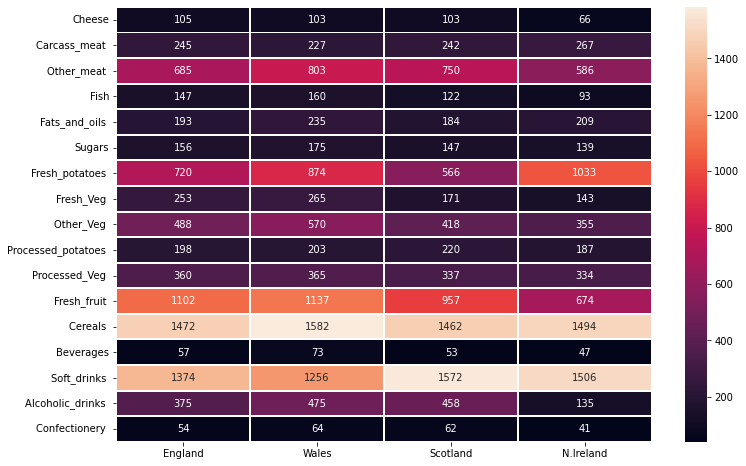

In [95]:
plt.figure(figsize = (12, 8))
sns.heatmap(data, lw = 1, annot = True, fmt = 'd')

In [96]:
transposed_data = data.transpose()

## Building an Autoencoder

### Scaling Data

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

final_data = scaler.fit_transform(transposed_data)

### Creating Encoder

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [116]:
encoder = Sequential()

encoder.add(Dense(units = 12, activation = 'relu', input_shape = [17]))
encoder.add(Dense(units = 8, activation = 'relu'))
encoder.add(Dense(units = 4, activation = 'relu'))
encoder.add(Dense(units = 2, activation = 'relu'))

### Creating Decoder

In [117]:
decoder = Sequential()

decoder.add(Dense(units = 4, activation = 'relu', input_shape = [2]))
decoder.add(Dense(units = 8, activation = 'relu'))
decoder.add(Dense(units = 12, activation = 'relu'))
decoder.add(Dense(units = 17, activation = 'relu'))

### Now Creating Full Model

In [118]:
autoencoder = Sequential([encoder, decoder])

In [119]:
autoencoder.compile(loss = 'mse', optimizer = SGD(learning_rate = 0.1))

### Training

In [120]:
autoencoder.fit(final_data, final_data, epochs = 15)

Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.4162
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4106
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4054
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4004
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3956
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3912
Epoch 7/15
1/1 [==============================] - 0s 17ms/step - loss: 0.3863
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3817
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3774
Epoch 10/15
1/1 [==============================] - 0s 11ms/step - loss: 0.3734
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3697
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3662
Epoch 13/15
1/1 [==============================] - 0s 16ms/step - lo

### Testing

In [121]:
predictions = encoder.predict(final_data)

In [122]:
predictions

array([[0.42293072, 0.        ],
       [0.6471489 , 0.        ],
       [0.37089413, 0.        ],
       [0.5269497 , 0.        ]], dtype=float32)

In [123]:
preds = pd.DataFrame(predictions, columns = ['A1', 'A2'], index = transposed_data.index)

In [124]:
transposed_data.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [125]:
preds

,A1,A2
England,0.422931,0.0
Wales,0.647149,0.0
Scotland,0.370894,0.0
N.Ireland,0.526950,0.0


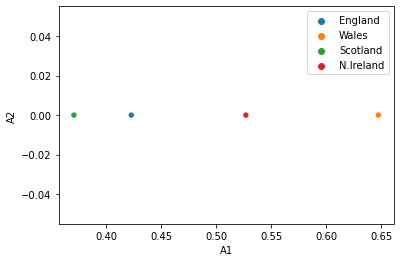

In [126]:
sns.scatterplot(data = preds, x = 'A1', y = 'A2', hue = preds.index)